In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pydicom
import numpy as np

In [2]:
def find_folder_by_number(root_folder, target_number):
    for root, dirs, _ in os.walk(root_folder):
        for dir_name in dirs:
            if dir_name == target_number:
                return os.path.join(root, dir_name)

    return None

root_folder = "./train_images"
target_number = '702807833'

result_folder = find_folder_by_number(root_folder, target_number)

if result_folder:
    print(f"Folder with number {target_number} found at: {result_folder}")
else:
    print(f"Folder with number {target_number} not found.")

Folder with number 702807833 found at: ./train_images\4003253\702807833


In [3]:
# train_images

# 1 study_id = 3 series_id (???)
# 1 series_id = ??? .dcm files
# Each series_id contains image slices of the body (like a burger or a scan)

In [4]:
# Get labels
labels = pd.read_csv('./train_label_coordinates.csv')

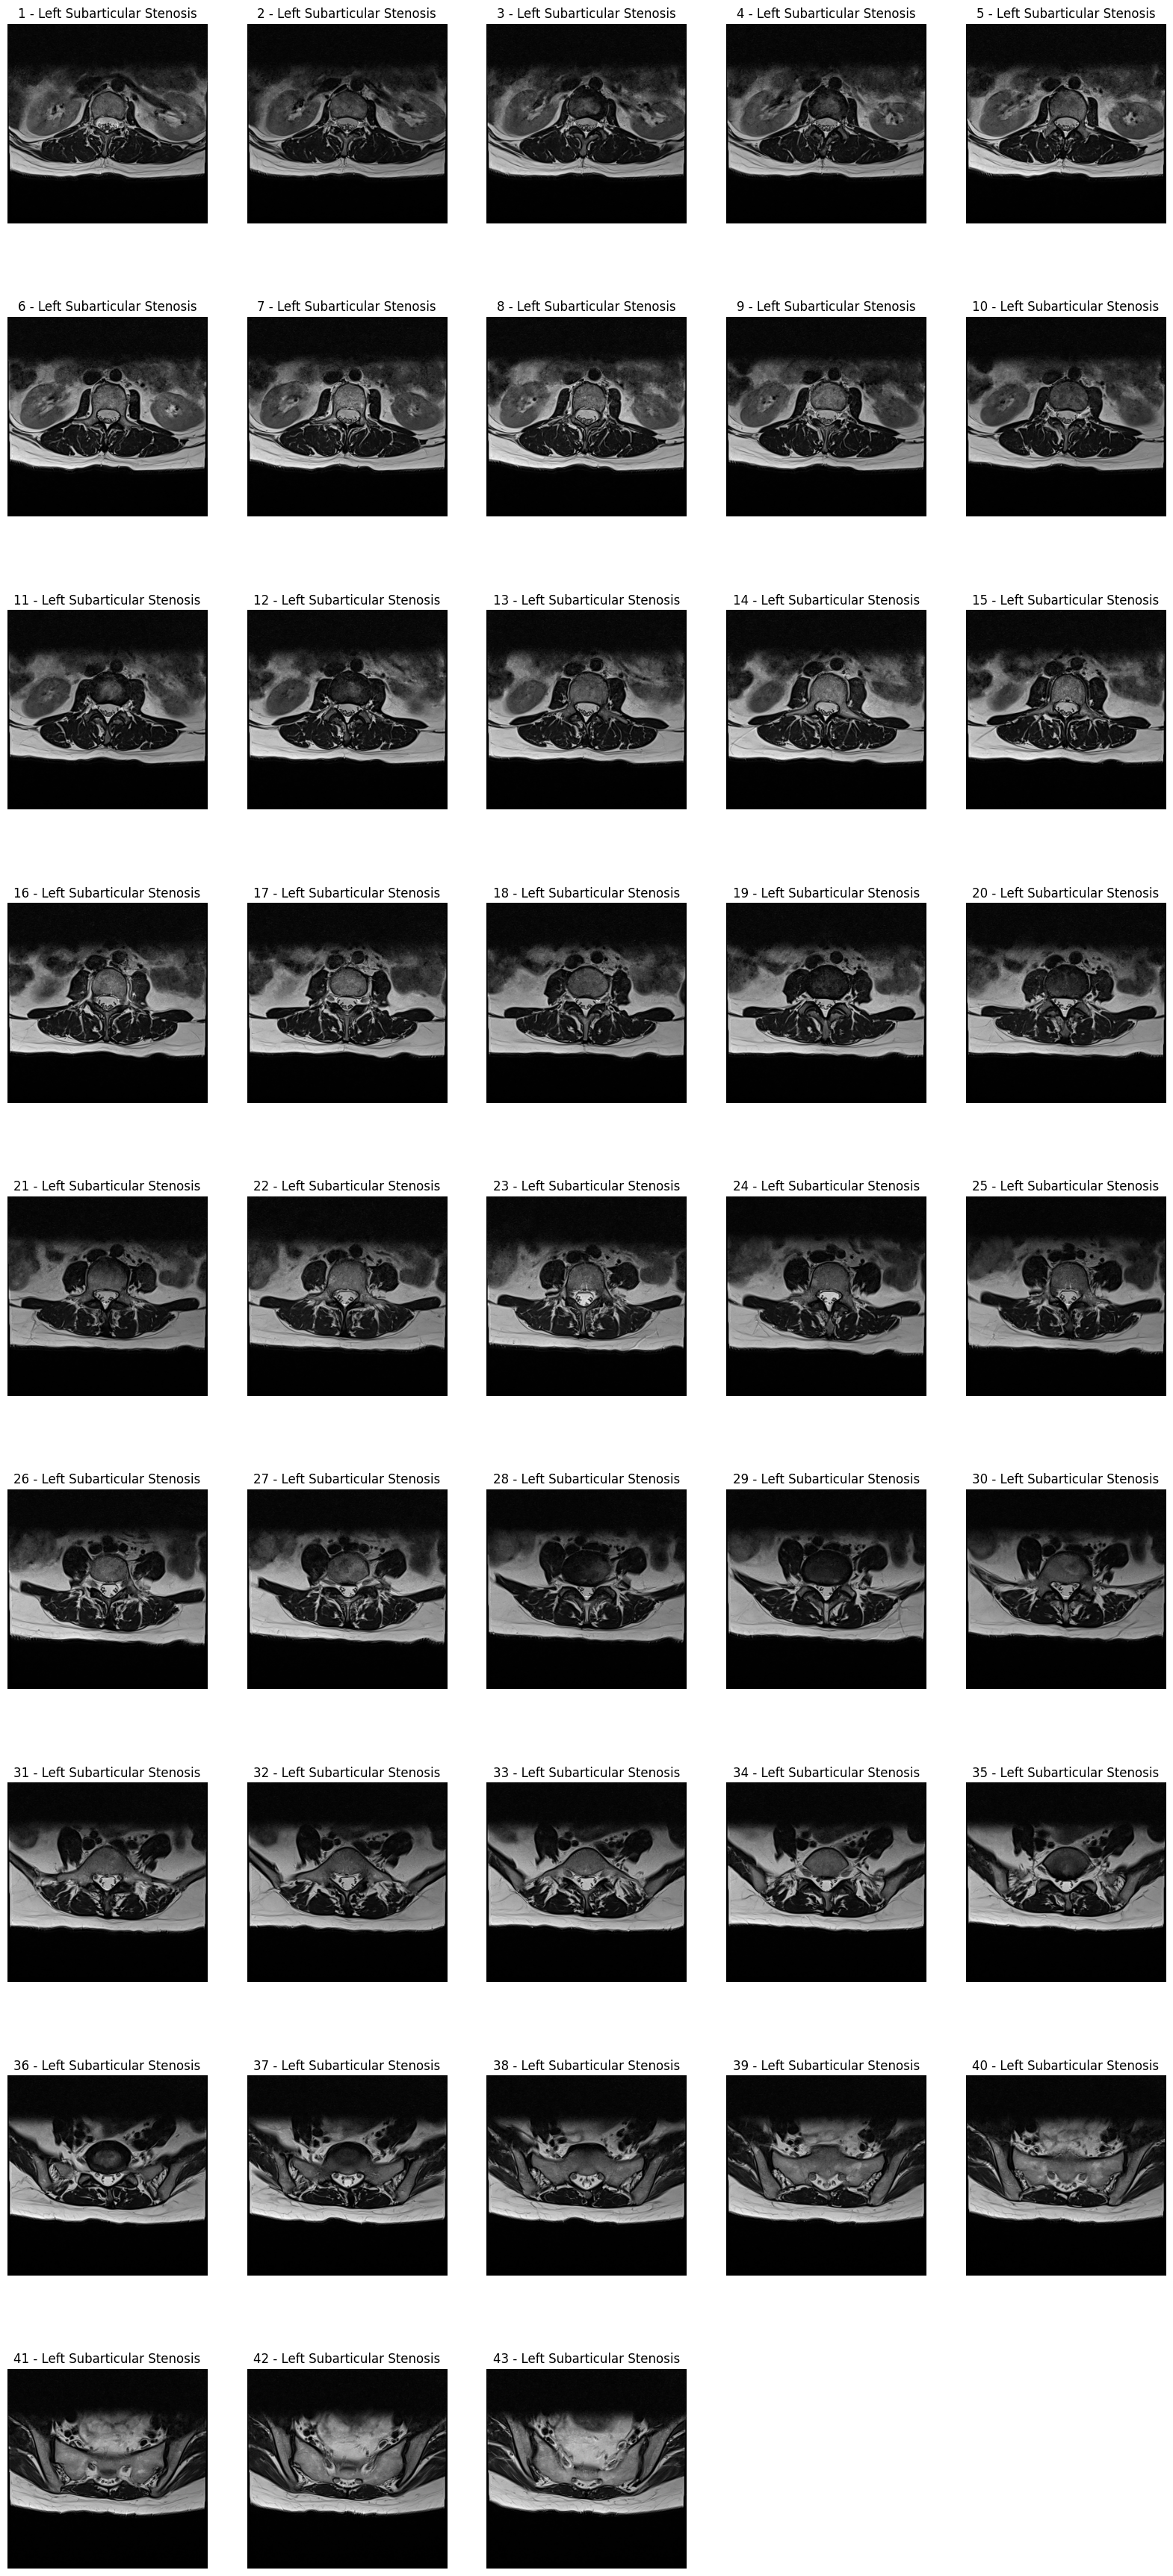

In [7]:
study_id = 4003253
series_id = 2448190387

folder_path = f'./small_train_images/{study_id}/{series_id}'

# Make sorted file numbers
name_store = []
for file_name in os.listdir(folder_path):
    name_store.append(int(file_name[:-4]))
sorted_file_names = sorted(name_store)

# Dynamically adjust the number of rows and columns for subplots based on the number .dcm files in the folder
num_files = len(sorted_file_names)
num_rows = (num_files - 1) // 5 + 1
num_cols = min(num_files, 5)

# Get label
label = labels[(labels['study_id'] == study_id) & (labels['series_id'] == series_id)]['condition'].iloc[0]
# label = labels[(labels['study_id'] == study_id) & (labels['series_id'] == series_id)][['level', 'condition']].iloc[0]

# Plot
plt.figure(figsize=(20, 5*num_rows))
for i, file_index in enumerate(sorted_file_names):
    name_concat = f'{folder_path}/{file_index}.dcm'
    ds = pydicom.dcmread(name_concat)
    image = ds.pixel_array
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'{file_index} - {label}')
plt.show()

In [6]:
# Get labels
labels = pd.read_csv('./train_label_coordinates.csv')

In [15]:
label = labels[(labels['study_id'] == 3996069892) & (labels['series_id'] == 10996)][['level']]
label

,level
45329,L4/L5
45330,L3/L4
45331,L5/S1
45332,L1/L2
45333,L2/L3
45334,L2/L3
45335,L3/L4
45336,L1/L2
45337,L4/L5
45338,L5/S1
